In [70]:
import scipy.stats as ss
import pylab as plt
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
import pyabc
from pyabc.plots import plot_marginals, plot_particles
from pyabc.examples import clinic

%matplotlib notebook

In [19]:
# get simulator and look at some data
simulator = clinic.simulator

simulator.__code__.co_argcount, simulator.__code__.co_varnames

(2,
 ('self',
  'lmbd',
  'nr_doctors',
  'patients_in_treatment',
  'result',
  'treatment_time',
  'create_patient_list',
  'list_of_patients',
  'N',
  'i',
  'arrival',
  'doctor',
  'treatment_end',
  'waiting_time'))

In [41]:
# create observation
lambda0 = 1/8

y0 = simulator(lambda0)
y0

[[65], array([  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   8.84327025,   8.52565815,   9.26937491,
         17.12378009,  14.19508581,  12.47497919,  16.2454506 ,
         17.34922121,  16.33025642,   8.01236479,   5.9783155 ,
          0.        ,   5.00474256,   5.77118427,   2.09849867,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   2.67147968,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          4.84453159,   9.51888421,   2.43605021,   8.34937146,
          9.91620028,  14.17357175,   9.682664  ,   7.59616881,
          6.25469464,  12.62248419,   4.30842425,   0.08339175,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        

In [38]:
# get summaries
summaries = clinic.summaries
clinic.summary_names

['closing_time', 'nr_patients', 'nr_waiting_patients']

In [42]:
for s in summaries:
    print(s(y0))
    
# any other summary stats? what about total waiting time?

[ 973.28369366]
[65]
[27]


<IPython.core.display.Javascript object>


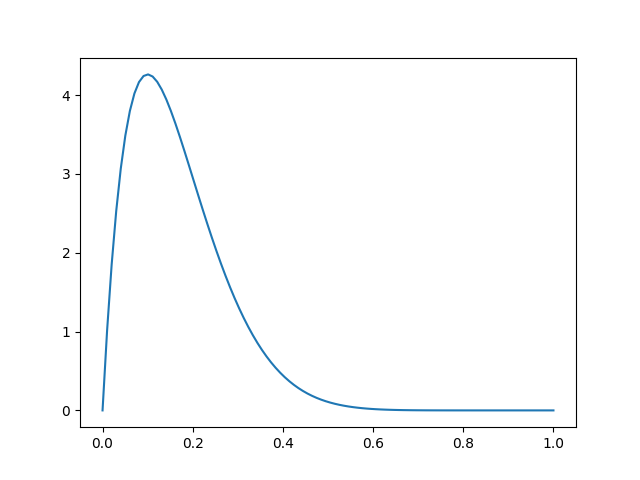

In [52]:
# prior
prior = pyabc.Prior("beta", 2, 10, name="lambda")

x = np.linspace(0, 1, 100)
y = prior.pdf(x)
plt.plot(x,y)

In [60]:
rej = pyabc.RejectionSampler(simulator=simulator, summaries=summaries, priors=prior, observation=y0)
mcmc = pyabc.MCMCSampler(simulator=simulator, summaries=summaries, priors=prior, observation=y0)
smc = pyabc.SMCSampler(simulator=simulator, summaries=summaries, priors=prior, observation=y0)
abcde = pyabc.ABCDESampler(simulator=simulator, summaries=summaries, priors=prior, observation=y0)

In [73]:
rej.sample(nr_samples=100, threshold=3)

Rejection sampler started with threshold: 3 and number of samples: 100
Samples:    100 - Threshold: 3.0000 - Iterations:      40000 - Acceptance rate: 0.002500 - Time:    14.29 s


In [77]:
mcmc.sample(nr_samples=100, threshold=3, step_size=[0.1])

MCMC sampler started with threshold: 3 and number of samples: 100
Samples:    100 - Threshold: 3.0000 - Iterations:      19284 - Acceptance rate: 0.005186 - Time:    16.91 s


In [76]:
smc.sample(nr_samples=100, thresholds=np.linspace(5,3,5))

SMC sampler started with thresholds: [ 5.   4.5  4.   3.5  3. ] and number of samples: 100
Iteration 0 completed
starting iteration[ 1 ]
Iteration 1 completed
starting iteration[ 2 ]
Iteration 2 completed
starting iteration[ 3 ]
Iteration 3 completed
starting iteration[ 4 ]
Iteration 4 completed
Samples:    100 - Thresholds: 3.00 - Iterations:      42196 - Acceptance rate: 0.002370 - Time:    29.86 s


In [78]:
abcde.sample(nr_samples=100, nr_iter=50, nr_groups=5, burn_in=50, alpha=0, beta=0, kappa=0.9)

ABC-Differential-Evolution sampler started with number of samples: 100
initializing pools
Samples:    100 - Iterations:         50 - Acceptance rate: None - Time:     8.31 s


<IPython.core.display.Javascript object>


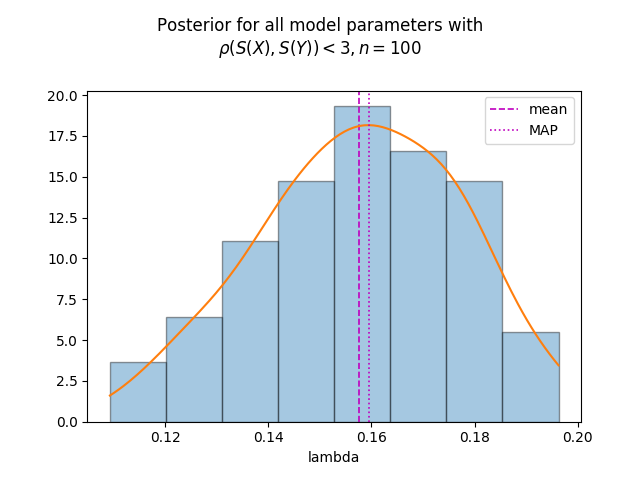

<IPython.core.display.Javascript object>


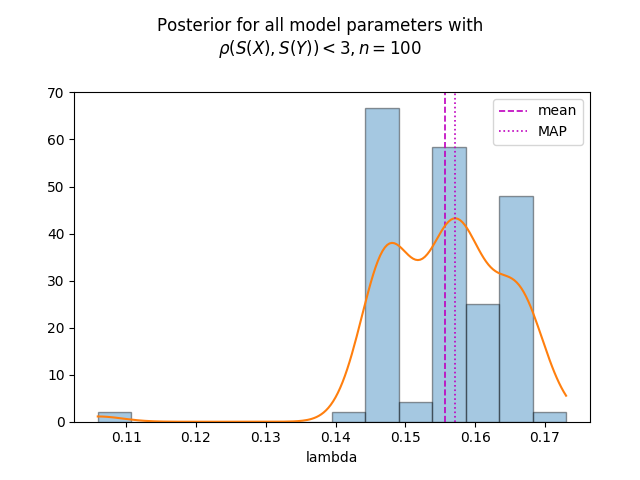

<IPython.core.display.Javascript object>


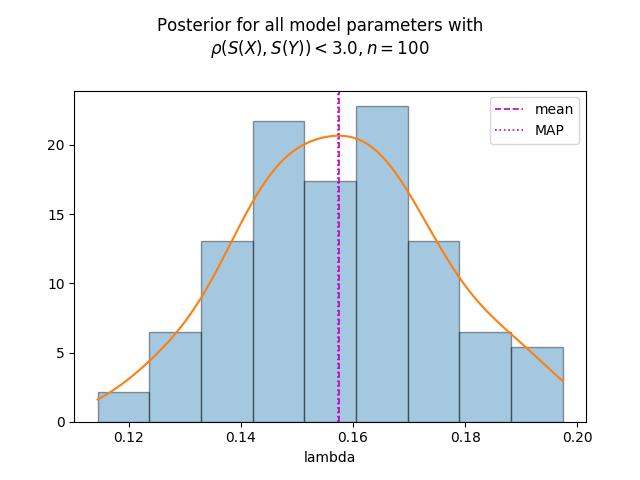

<IPython.core.display.Javascript object>


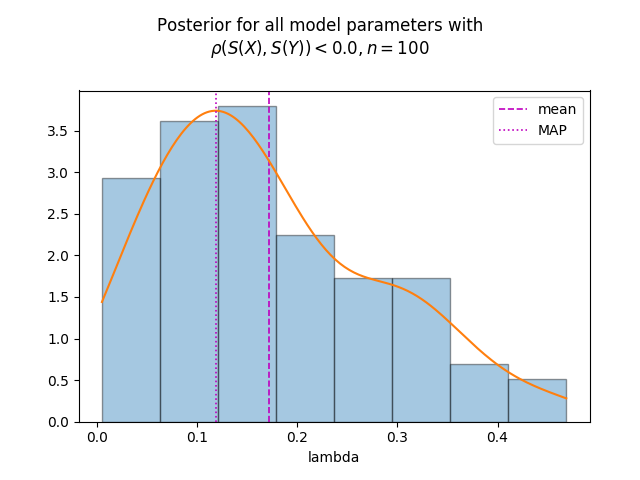

<IPython.core.display.Javascript object>


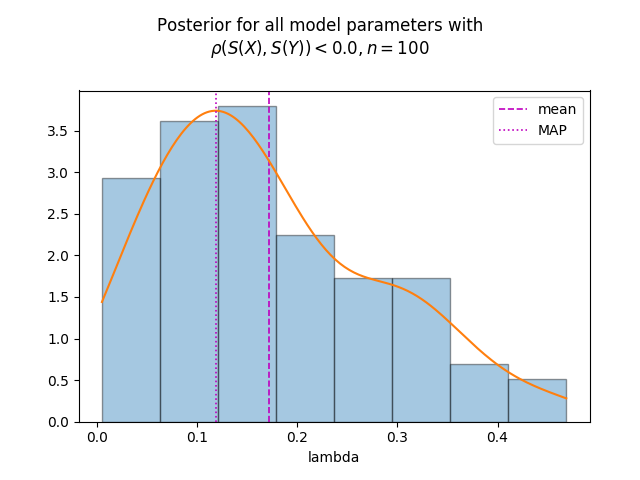

In [79]:
plot_marginals(rej)
plot_marginals(mcmc)
plot_marginals(smc)
plot_marginals(abcde)

<IPython.core.display.Javascript object>


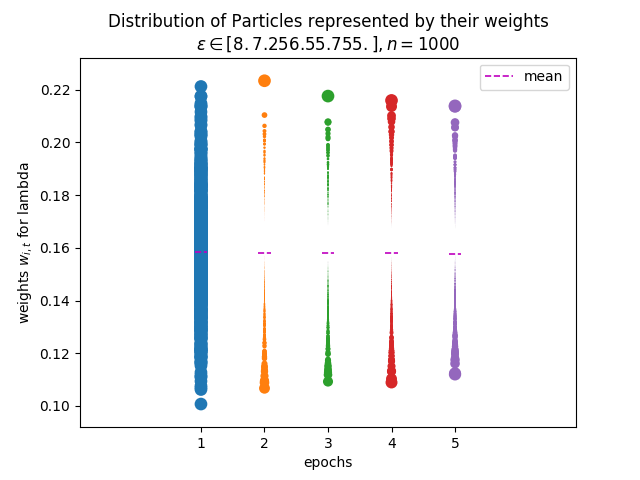

<IPython.core.display.Javascript object>


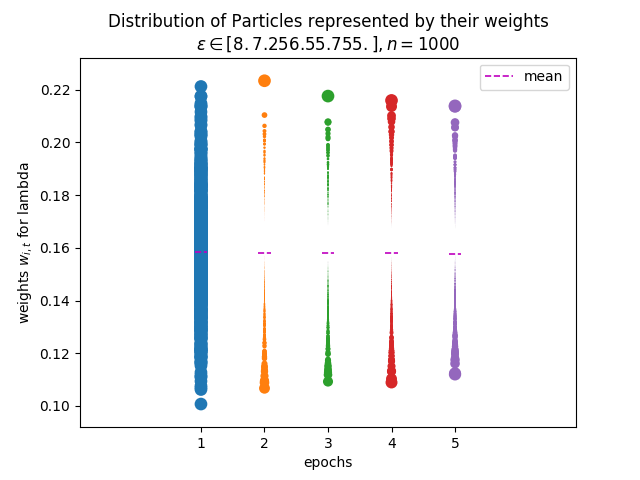

In [71]:
plot_particles(smc)